In [9]:
import pandas as pd

In [10]:
# jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000000
# NotebookApp.iopub_data_rate_limit = 10000000

In [41]:
directory = "/home/basa/AR_yolact/logs/"
with open(directory +"yolact_base-old.txt") as f:
    f =  f.readlines()
f

['{"type": "session", "session": 0, "data": {"autoscale": true, "batch_alloc": null, "batch_size": 8, "config": "yolact_base_config", "cuda": true, "dataset": null, "decay": 0.0005, "gamma": 0.1, "interrupt": true, "keep_latest": false, "keep_latest_interval": 100000, "log": true, "log_folder": "logs/", "log_gpu": false, "lr": 0.001, "momentum": 0.9, "num_workers": 4, "resume": null, "save_folder": "weights/", "save_interval": 10000, "start_iter": -1, "validation_epoch": 2, "validation_size": 5000}, "time": 1592418447.410912}\n',
 '{"type": "train", "session": 0, "data": {"loss": {"B": 5.23312, "M": 6.30713, "C": 25.71429, "S": 31.58851, "T": 68.84306}, "epoch": 0, "iter": 0, "lr": 0.0001, "elapsed": 12.822055101394653}, "time": 1592418462.8788955}\n',
 '{"type": "train", "session": 0, "data": {"loss": {"B": 5.47407, "M": 6.03264, "C": 23.73454, "S": 30.33422, "T": 65.57548}, "epoch": 0, "iter": 1, "lr": 0.0001018, "elapsed": 0.9079098701477051}, "time": 1592418463.786463}\n',
 '{"type

In [91]:
directory = "/home/basa/AR_yolact/logs/"
with open(directory +"yolact_base_ExpCDC9.txt") as f:
    fs =  f.readlines()
# type(fs[1])

str

In [92]:
from ast import literal_eval
import json 
nw_fs = []
for n in fs:
    res = json.loads(n) 
    nw_fs.append(res)

nw_fs[2].keys()


dict_keys(['type', 'session', 'data', 'time'])

In [89]:
fs.keys()

AttributeError: 'list' object has no attribute 'keys'

## Loss Keys:
####  - B: Box Localization Loss 
####  - C: Class Confidence Loss 
####  - M: Mask Loss 
####  - P: Prototype Loss 
###  - D: Coefficient Diversity Loss 
####  - E: Class Existence Loss 
####  - S: Semantic Segmentation Loss 

In [24]:
import pandas as pd
nw_fdf = pd.DataFrame(nw_f)
nw_fdf = nw_fdf[nw_fdf["type"]=="train"]
d=list(nw_fdf["session"])
tot_ls = {}
# for u in range(d[-1]):
for u in nw_fdf["session"].unique()
    tot_ls[u] = (nw_fdf[nw_fdf["session"]==u])
# Extraxt the data that contains the losses
dt_dic = {}
# print(tot_ls[5])
dt_dic_df = {}
for we in tot_ls.keys():
    dt_dic[we] = []
    for a in range(len(tot_ls[we])):
        dt_dic[we].append(tot_ls[we].iloc[a,2])
    dt_dic_df[we] = pd.DataFrame(dt_dic[we])
# print(dt_dic[27])
#Generate the dataframe of the different losses
dt_dic2  = {}import pandas as pd
nw_fdf = pd.DataFrame(nw_fs)
nw_fdf = nw_fdf[nw_fdf["type"]=="train"]
d=list(nw_fdf["session"])
tot_ls = {}
# for u in range(d[-1]):
for u in nw_fdf["session"].unique()
    tot_ls[u] = (nw_fdf[nw_fdf["session"]==u])
# Extraxt the data that contains the losses
dt_dic = {}
# print(tot_ls[5])
dt_dic_df = {}
for we in tot_ls.keys():
    dt_dic[we] = []
    for a in range(len(tot_ls[we])):
        dt_dic[we].append(tot_ls[we].iloc[a,2])
    dt_dic_df[we] = pd.DataFrame(dt_dic[we])
# print(dt_dic[27])
#Generate the dataframe of the different losses
dt_dic2  = {}
dt_dic2_df = {}
for p in dt_dic_df.keys():
    dt_dic2[p] = []
    if len(dt_dic_df[p]) > 1:
        for n in range(len(dt_dic_df[p])):
            dt_dic2[p].append(dt_dic_df[p].iloc[n,0])
        dt_dic2_df[p]  = pd.DataFrame(dt_dic2[p])
    else:
        del dt_dic2[p]
# dt_dic2_df[2]


nw_fdf["session"].unique()
dt_dic2_df = {}
for p in dt_dic_df.keys():
    dt_dic2[p] = []
    if len(dt_dic_df[p]) > 1:
        for n in range(len(dt_dic_df[p])):
            dt_dic2[p].append(dt_dic_df[p].iloc[n,0])
        dt_dic2_df[p]  = pd.DataFrame(dt_dic2[p])
    else:
        del dt_dic2[p]
# dt_dic2_df[2]


nw_fdf["session"].unique()

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 17, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [95]:
from ast import literal_eval
import json 
import pandas as pd
import matplotlib.pyplot as plt
import tkinter as tk
import os
import time
from pathlib import Path
from tkinter import filedialog, simpledialog

def uichoosefile(title = None, initialdir = None):
    root = tk.Tk()
    root.withdraw() # we don't want a full GUI, so keep the root window from appearing
    filename = tk.filedialog.askopenfilename(title=title, initialdir = initialdir)
    return filename
def loss_values_analysis(file):
    with open(file) as f:
        f =  f.readlines()
    nw_f = []
    # unstring the string dataset
    for n in f:
        res = json.loads(n) 
        nw_f.append(res)
    # convert the dictionary to dataframe
    nw_fdf = pd.DataFrame(nw_f)
    nw_fdf = nw_fdf[nw_fdf["type"]=="train"]
    tot_ls = {}
    for u in nw_fdf["session"].unique():
        tot_ls[u] = (nw_fdf[nw_fdf["session"]==u])
    # Extraxt the data that contains the losses
    dt_dic = {}
    dt_dic_df = {}
    for we in tot_ls.keys():
        dt_dic[we] = []
        for a in range(len(tot_ls[we])):
            dt_dic[we].append(tot_ls[we].iloc[a,2])
        dt_dic_df[we] = pd.DataFrame(dt_dic[we])
    #Generate the dataframe of the different losses
    dt_dic2  = {}
    dt_dic2_df = {}
    for p in dt_dic_df.keys():
        dt_dic2[p] = []
        if len(dt_dic_df[p]) > 1:
            for n in range(len(dt_dic_df[p])):
                dt_dic2[p].append(dt_dic_df[p].iloc[n,0])
            dt_dic2_df[p]  = pd.DataFrame(dt_dic2[p])
        else:
            del dt_dic2[p]
    return dt_dic2_df

In [55]:
# rt = loss_values_analysis(uichoosefile())
# rt = loss_values_analysis(file = "/home/basa/AR_yolact/yolact_base-old.log")
# rt[0] file:///home/basa/AR_yolact/logs/yolact_base_ExpCDC9.log

In [96]:
df = loss_values_analysis(file= "/home/basa/AR_yolact/logs/yolact_base_ExpCDC9.txt")
df[62]

,B,M,C,S,T
0,1.90485,2.36975,2.80748,0.23290,7.31498
1,1.47259,1.63195,2.16301,0.12424,5.39180
2,2.12497,2.82426,2.90016,0.34367,8.19306
3,0.75244,1.33554,1.39188,0.15223,3.63209
4,2.05154,3.01727,2.15040,0.18260,7.40182
...,...,...,...,...,...
101295,0.29986,6.82624,0.14714,0.06810,7.34133
101296,0.39923,1.26054,0.22910,0.03230,1.92117
101297,0.61482,0.91132,0.33742,0.05177,1.91534
101298,0.39398,0.92214,0.46188,0.04413,1.82213


In [128]:
df.keys()

dict_keys([1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 62])

In [133]:
print(len(df[59]['T']), len(df[62]['T']))

2780 101300


[38833] 0.3363


90954

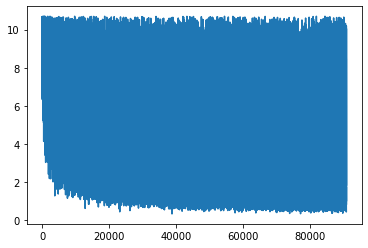

In [157]:
sess = 59
sf = df[59]['T']+df[62]['T']

six = df[62]['T']

df_list = list(df[59]['T'])
for i in range(len(df[62]['T'])):
    df_list.append(six[i])
# plt.plot(sf)
# print(sf)
df_list
# plt.plot(df_list)
# y_min = sf.min()
# y_max = df[sess]['T'].max()
# y = df[sess]['T']
# x_max = 0
# x_list = []
# for x in range(len(y)):
#     if y[x] == y_min:
#         x_list.append(x)
# y[0]
# # y[101299]
# # len(y)
# x_list
import numpy as np
df_mean = np.mean(df_list)
df_std = np.std(df_list)

x_upper = df_mean + 1.5*df_std
x_lower = df_mean - 1.5*df_std

plot_df  = []
for x in df_list:
    if x > x_upper or x < 0:
#         print(x)
        df_list.remove(x)
    else:
        plot_df.append(x)
        
plt.plot(plot_df)

y_min = np.min(plot_df)
y_max = df[sess]['T'].max()
y = plot_df
# x_max = 0
x_list = []
for x in range(len(y)):
    if y[x] == y_min:
        x_list.append(x)
print(x_list,y_min)
len(plot_df)
# df_mean
# x_upper
# x_lower

In [62]:
ax,fig = plt.figure()
fig = dt_dic2_df[2]["M"]
y_min = dt_dic2_df[2]["B"].min()
xpos = y.index(y_min)
x_min = x[xpos]
ax.annotate('local min', xy =(x_min,y_min), xytext = (x_min,y_min+5))
plt.show()

TypeError: cannot unpack non-iterable Figure object

<Figure size 432x288 with 0 Axes>

In [85]:
dt_dic2_df.keys()


dict_keys([0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

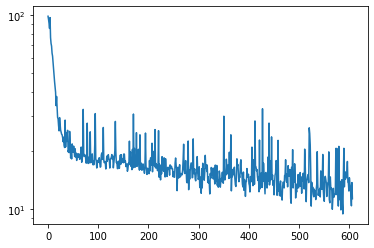

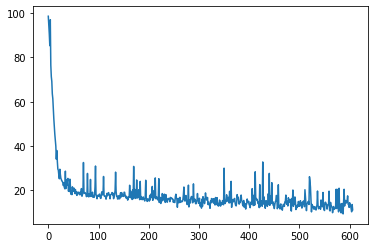

In [86]:
# plt.plot(dt_dic2_df[2]["M"]
# dt_dic2_df[2]["M"]
# fig, ax = plt.subplots(2,2)
# plt.plot(dt_dic2_df[2]["M"])
# plt.annotate('min', xy = (0,0), xycoords ='data', xytext=(2,3),arrowprops= dict(facecolor='black', shrink=0.05))
# plt.show()
plt.semilogy(dt_dic2_df[32]["T"])
plt.show()
plt.plot(dt_dic2_df[32]["T"])
plt.show()

In [ ]:
plt.plot(dt_dic2_df[2]["S"])

In [ ]:
plt.plot(dt_dic2_df[2]["T"])

In [ ]:
plt.plot(dt_dic2_df[21]["B"])

In [ ]:
plt.plot(dt_dic2_df[21]["M"])

In [ ]:
plt.plot(dt_dic2_df[21]["C"])

In [ ]:
plt.plot(dt_dic2_df[21]["S"])

In [ ]:
plt.plot(dt_dic2_df[19]["T"])

In [ ]:
# import pandas as pd
# nw_fdf = pd.DataFrame(nw_f)
# nw_fdf=nw_fdf[nw_fdf["type"]=="train"]
# nw_fdf["session"]
# tot_ls = {}
# for u in nw_fdf["session"].unique():

#     tot_ls[u] = (nw_fdf[nw_fdf["session"]==u])
# dt_dic = {}
# dt_dic_df = {}
# # print(tot_ls.keys())
# for we in tot_ls.keys():
#     dt_dic[we] = []
# #     tot_df[we] = []
#     for a in range(len(tot_ls[we])):
#         if len(tot_ls[we])>1:
#             dt_dic[we].append(tot_ls[we].iloc[a,2])
# dt_dic_df = {}
# for yo in dt_dic.keys():
#         dt_dic_df[yo] = pd.DataFrame(dt_dic[yo])
        
# # dt_dic_df.keys()
# dt_dic2  = {}
# dt_dic2_df = {}
# for p in dt_dic_df.keys():
#     dt_dic2[p] = []
#     if "loss" in dt_dic_df[p].columns:
#         for n in range(len(dt_dic_df[p])):
#             dt_dic2[p].append(dt_dic_df[p].loc[n,"loss"])
#         dt_dic2_df[p]  = pd.DataFrame(dt_dic2[p])
#     else:
#         del dt_dic2[p]
# dt_dic_df[9]

In [ ]:
for g in range(5):
    print(int(g))

In [ ]:
# import pandas as pd
# nw_fdf = pd.DataFrame(nw_f)

# nw_fdf["session"].unique()
# tot_ls = {}
# for u in nw_fdf["session"].unique():
# #     print(type(u))
# #     u = int(u)
#     tot_ls[u] = (nw_fdf[nw_fdf["session"]==u])
# # tot_ls
# dt_dic = {}
# print(tot_ls.keys())
# for we in tot_ls.keys():
# #     print(type(we))
#     dt_dic[we] = []
# #     tot_df[we] = []
#     for a in range(len(tot_ls[we])):
# #         if len(tot_ls[we])>1:
#         dt_dic[we].append(tot_ls[we].iloc[a,2])
# dt_dic_df = {}
# for yo in dt_dic.keys():
#         dt_dic_df[yo] = pd.DataFrame(dt_dic[yo])
# # type(dt_dic_df.keys())
# dt_dic2  = {}
# dt_dic2_df = {}
# for p in dt_dic_df.keys():
# #     print(type(p))
#     dt_dic2[p] = []
#     if "loss" in dt_dic_df[p].columns:
#         for n in range(len(dt_dic_df[p])):
#             dt_dic2[p].append(dt_dic_df[p].loc[n,"loss"])
#         dt_dic2_df[p]  = pd.DataFrame(dt_dic2[p])
#     else:
#         del dt_dic2[p]
# # dt_dic2_df
# t_df = {}

# tt = {}
# for m in dt_dic2_df.keys():
# #     print(type(m))
#     tt_df[m] = []
#     for n in range(1, len(dt_dic2_df[m])):
#         tt_df[m].append(dt_dic2_df[m].iloc[n,0])
#     tt[m]= pd.DataFrame(tt_df[m])


In [ ]:
import matplotlib.pyplot as plt
# plt.plot(tt[30]["T"])

In [ ]:
tt

In [ ]:
# dt_dic2  = {}
# dt_dic2_df = {}
# for p in dt_dic_df.keys():
#     dt_dic2[p] = []
#     for n in range(len(dt_dic_df[p])):
#         dt_dic2[p].append(dt_dic_df[p].iloc[n,-4])
#     dt_dic2_df[p]  = pd.DataFrame(dt_dic2[p])
# dt_dic2_df[1]

In [ ]:
dt_dic_df[9].iloc[3,-4]

In [ ]:
#         dt_dic2[p].append(dt_dic_df[p].iloc[n,0])
#     dt_dic2_df[p]  = pd.DataFrame(dt_dic2[p])
# dt_dic2[27]